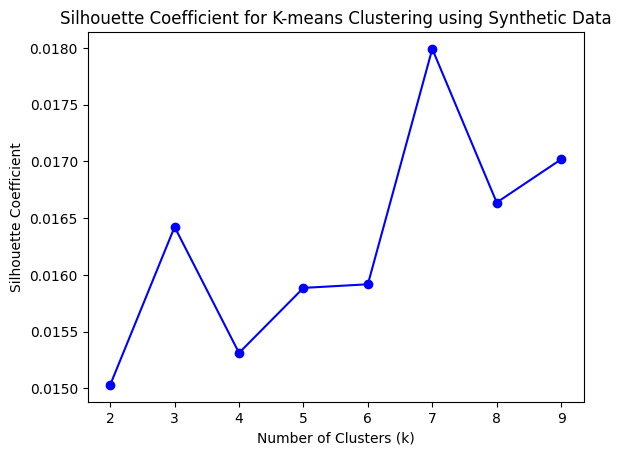

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Function to read and process the dataset
def process_dataset(file_name):
    df = pd.read_csv(file_name, header=None)
    data = []
    for index, row in df.iterrows():
        parts = row[0].strip().split(" ")
        numeric_parts = []
        for part in parts:
            try:
                numeric_part = float(part)
                numeric_parts.append(numeric_part)
            except ValueError:
                continue
        data.append(numeric_parts)
    return np.array(data)

# Function to compute Euclidean distance between two points
def compute_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Function for K-means clustering
def kmeans(X, k, max_iters=100):
    centroids = X[random.sample(range(X.shape[0]), k)]
    for i in range(max_iters):
        distances = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels

# Read and process the dataset
data = process_dataset("dataset")

# Generate synthetic data of the same size as the dataset
np.random.seed(42)  # For reproducibility
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
synthetic_data = np.random.normal(mean, std_dev, size=data.shape)

# Compute Silhouette coefficient for K-means clustering
silhouette_scores = []
for k in range(2, 10):
    labels = kmeans(synthetic_data, k)
    
    silhouette_sum = 0
    for i in range(len(synthetic_data)):
        a_i = np.mean([compute_distance(synthetic_data[i], synthetic_data[j]) for j in range(len(synthetic_data)) if labels[j] == labels[i] and j != i])
        b_i = min([np.mean([compute_distance(synthetic_data[i], synthetic_data[j]) for j in range(len(synthetic_data)) if labels[j] != labels[i]])])
        silhouette_sum += (b_i - a_i) / max(a_i, b_i)
    
    silhouette_avg = silhouette_sum / len(synthetic_data)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette coefficient for different values of k
plt.plot(range(2, 10), silhouette_scores, '-bo')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for K-means Clustering using Synthetic Data')
plt.show()
